# Meep 计算光子晶体能带 (五)文献重复： 谷拓扑光子晶体
日期：2023-04-22

有了前面的准备，我们现在开始用MEEP计算更加高端的拓扑光子晶体波导结构:

主要参考文献为：
Chen, Y. et al. Topologically Protected Valley-Dependent Quantum Photonic Circuits. Phys. Rev. Lett. 126, 230503 (2021).

其结构参数如下：
六角结构，$s_{1}=87 nm, s_{2}=127nm,a=470 nm$,

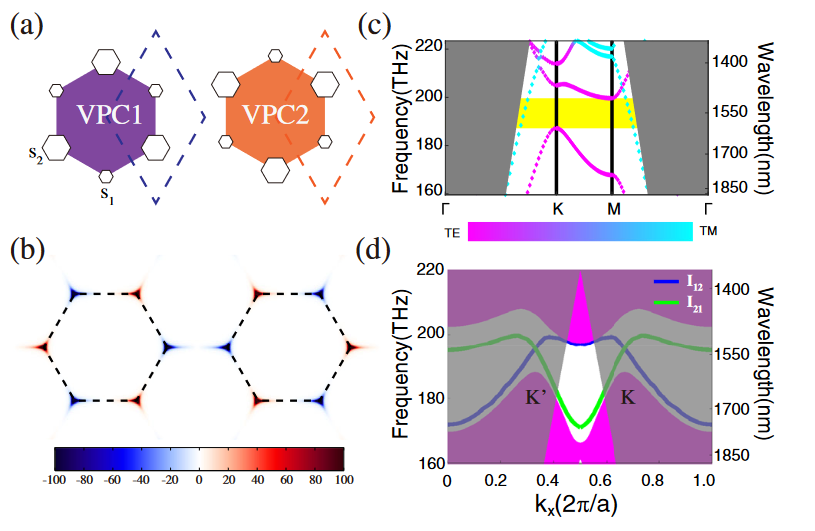

https://github.com/NanoComp/meep/issues/757

根据文章结果，我们主要关注TE模式即可

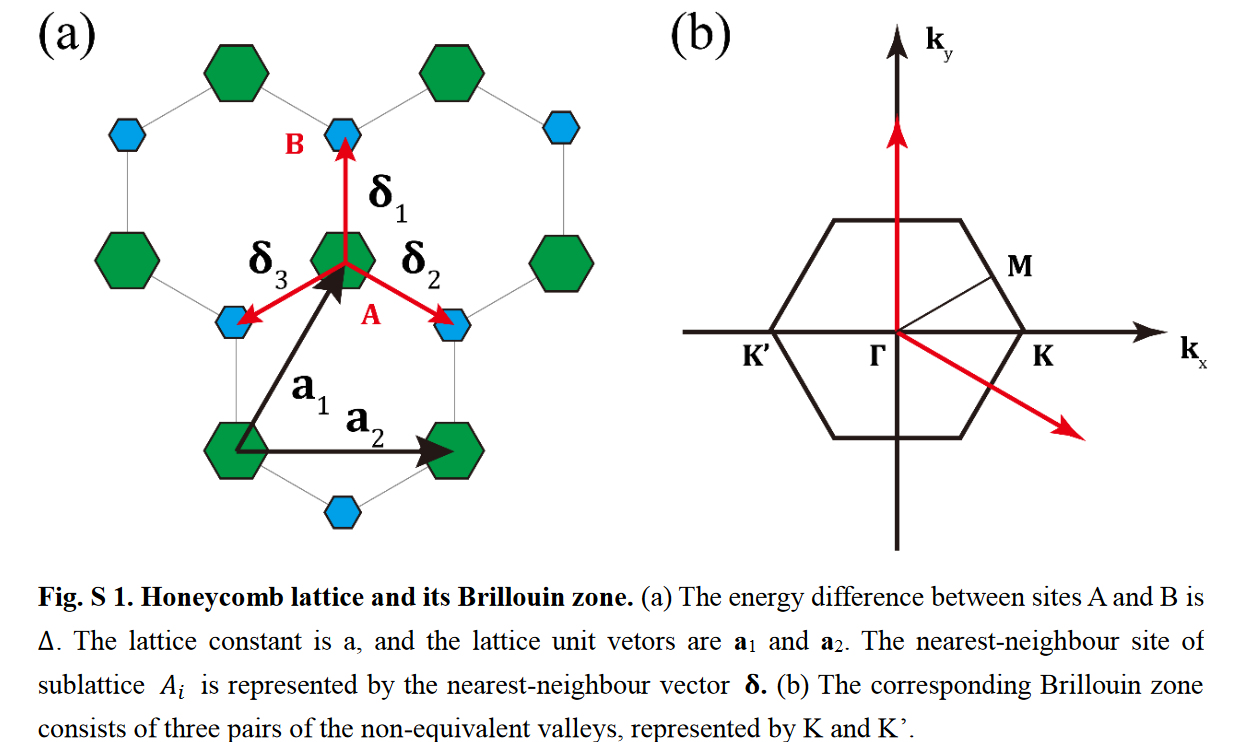

能带周期方向以及结构设置如上图，介质折射率为2.48

我们需要用到倒格矢与原基矢量的关系：

$$
\left\{\begin{matrix}  \boldsymbol{b}_1=\frac{2\pi  \boldsymbol{a}_2\times \boldsymbol{a}_3}{\boldsymbol{a}_1\cdot (\boldsymbol{a}_2\times \boldsymbol{a}_3)}  \\  \boldsymbol{b}_2=\frac{2\pi  \boldsymbol{a}_3\times \boldsymbol{a}_1}{\boldsymbol{a}_1\cdot (\boldsymbol{a}_2\times \boldsymbol{a}_3)}  \\  \boldsymbol{b}_3=\frac{2\pi  \boldsymbol{a}_1\times \boldsymbol{a}_2}{\boldsymbol{a}_1\cdot (\boldsymbol{a}_2\times \boldsymbol{a}_3)}  \end{matrix}\right.\\
$$
其中分母的物理意义代表着原胞的体积。计算图中结构时，需要首先确定最小原胞，可以有多种选取方式，按照图中的选取方法，最小原胞是一个平行四边形，原胞的两个基矢为

$$
a_{1}=(\frac{1}{2},\frac{\sqrt{3}}{2})a,a_{2}=(1,0)a
$$


按照图中的定义，可以计算出倒格子空间的矢量为

$$
b_{1}=(0,\frac{2}{\sqrt{3}})\frac{2\pi}{a},\\
b_{2}=(1,-\frac{1}{\sqrt{3}})\frac{2\pi}{a}
$$

我们计算能带，需要改变波矢来求频率本征值，按照图中的定义，$\Gamma$点为$(0,0)\frac{2\pi}{a}$，$K,M$点从图中也可以直接看出来，为

$$
K=(\frac{2}{3},0)\frac{2\pi}{a}=\frac{1}{3}b_{1}+\frac{2}{3}b_{2}
$$

$$
M=(\frac{1}{2},\frac{\sqrt{3}}{6})\frac{2\pi}{a}=\frac{1}{2}b_{1}+\frac{1}{2}b_{2}
$$

到此，所有的准备工作就做完了，接下来可以进行代码实现了。 我们选取的原胞如下图所示

In [1]:
import math
import meep as mp
from meep import mpb
import numpy as np
import matplotlib.pyplot as plt

num_bands = 4

# 定义好扫描的k波矢
k_points = [mp.Vector3(),          # Gamma
            mp.Vector3(1/3,2/3),       # K
            mp.Vector3(0.5,0.5),  # M
            mp.Vector3()]          # Gamma

# 对k波矢进行插值
k_points = mp.interpolate(40, k_points)

#  units of nm
s1=87
s2=127
a=470
# units of a
s1=s1/a
s2=s2/a


# 基本结构和材料性质
# 折射率设置
nslab = 2.48
slab = mp.Medium(index=nslab)

nair = 1
air = mp.Medium(index=nair)



geometry_lattice = mp.Lattice(
    size=mp.Vector3(1, 1),
    basis1=mp.Vector3(0.5, np.sqrt(3) / 2),
    basis2=mp.Vector3(1,0),
)

/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/tzh/miniconda3/envs/mp/lib/python3.11/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [6]:
# 设置一个六角结构
# A hexagonal prism defined by six vertices centered on the origin
# of material crystalline silicon (from the materials library)
vertices1 = [mp.cartesian_to_lattice(mp.Vector3(-1*s1,0),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(-0.5*s1,math.sqrt(3)/2*s1),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(0.5*s1,math.sqrt(3)/2*s1),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(1*s1,0),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(0.5*s1,-math.sqrt(3)/2*s1),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(-0.5*s1,-math.sqrt(3)/2*s1),geometry_lattice)]

vertices2 = [mp.cartesian_to_lattice(mp.Vector3(-1*s2,0),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(-0.5*s2,math.sqrt(3)/2*s2),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(0.5*s2,math.sqrt(3)/2*s2),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(1*s2,0),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(0.5*s2,-math.sqrt(3)/2*s2),geometry_lattice),
            mp.cartesian_to_lattice(mp.Vector3(-0.5*s2,-math.sqrt(3)/2*s2),geometry_lattice)]

# 中心位置的变换
xyc1=mp.cartesian_to_lattice(mp.Vector3(3/4+np.sqrt(3)/6*np.sqrt(3)/2,np.sqrt(3)/4+np.sqrt(3)/6/2),geometry_lattice)
xyc2=mp.cartesian_to_lattice(mp.Vector3(3/4-np.sqrt(3)/6*np.sqrt(3)/2,np.sqrt(3)/4-np.sqrt(3)/6/2),geometry_lattice)

In [22]:
# 六角结构也需要进行变换
geometry = [mp.Prism(vertices2, height=mp.inf, center=mp.Vector3(0,0), material=air)]
          # mp.Prism(vertices2, height=mp.inf, center=xyc2, material=air)]

In [19]:
resolution = 32

# mode solver设置
ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    default_material=slab,
                    resolution=resolution)

查看一下结构

In [20]:
ms.run_te()
te_freqs = ms.all_freqs
te_gaps = ms.gap_list
# ms.run_tm()
# tm_freqs = ms.all_freqs
# tm_gaps = ms.gap_list

Initializing eigensolver data
Computing 4 bands with 1e-07 tolerance
Working in 2 dimensions.
Grid size is 32 x 32 x 1.
Solving for 4 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (0.5, 0.866025, 0)
     (1, 0, 0)
     (0, 0, 1)
Cell volume = 0.866025
Reciprocal lattice vectors (/ 2 pi):
     (-0, 1.1547, -0)
     (1, -0.57735, 0)
     (-0, 0, 1)
Geometric objects:
     prism, center = (0,0,0)
          height 1e+20, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0,-0.185106,-5e+19)
          (0.185106,-0.185106,-5e+19)
          (0.185106,1.97244e-17,-5e+19)
          (0,0.185106,-5e+19)
          (-0.185106,0.185106,-5e+19)
          (-0.185106,-8.03113e-18,-5e+19)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: te.
Initializing fields to random numbers...
124 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.00813008130081300

    linmin: converged after 4 iterations.
    iteration    3: trace = 0.7739829188239411 (7.50178% change)
    linmin: converged after 5 iterations.
    iteration    4: trace = 0.7470136172937566 (3.54627% change)
    linmin: converged after 5 iterations.
    iteration    5: trace = 0.7155698506005767 (4.29976% change)
    linmin: converged after 5 iterations.
    iteration    6: trace = 0.6984181106404195 (2.42601% change)
    linmin: converged after 3 iterations.
    iteration    7: trace = 0.6944821607763957 (0.565145% change)
    linmin: converged after 4 iterations.
    iteration    8: trace = 0.6926593772445598 (0.262811% change)
    linmin: converged after 4 iterations.
    iteration    9: trace = 0.6919964648778545 (0.0957512% change)
    linmin: converged after 4 iterations.
    switching to approximate line minimization (decrease time by 56.0219%)
    iteration   10: trace = 0.6918214745987753 (0.0252909% change)
    switching back to exact line minimization
    iteration   1

    linmin: converged after 2 iterations.
    iteration   11: trace = 0.6845299077498579 (1.48762e-05% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 53.1875%)
    iteration   12: trace = 0.6845298701463326 (5.49334e-06% change)
Finished solving for bands 1 to 4 after 12 iterations.
tefreqs:, 5, 0.0325203, 0.0650407, 0, 0.0650407, 0.0292559, 0.459174, 0.485662, 0.486791
elapsed time for k point: 0.01589798927307129
solve_kpoint (0.0406504,0.0813008,0):
Solving for bands 1 to 4...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.6798823415957055 (0.0487774% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.6795107586924064 (0.0546689% change)
    linmin: converged after 3 iterations.
    switching to approximate line minimization (decrease time by 50.4456%)
    iteration    3: trace = 0.6794125968637912 (0.014447% change)
    switching back to exact line minimization


    iteration    7: trace = 0.637577358980001 (1.25963e-05% change)
    iteration    8: trace = 0.6375772828049511 (1.19476e-05% change)
    iteration    9: trace = 0.6375772642309339 (2.91322e-06% change)
Finished solving for bands 1 to 4 after 9 iterations.
tefreqs:, 12, 0.0894309, 0.178862, 0, 0.178862, 0.0803721, 0.427078, 0.45502, 0.491608
elapsed time for k point: 0.010114431381225586
solve_kpoint (0.097561,0.195122,0):
Solving for bands 1 to 4...
    linmin: converged after 3 iterations.
    switching to approximate line minimization (decrease time by 70.6067%)
    iteration    1: trace = 0.6308575922843287 (0.0172818% change)
    iteration    2: trace = 0.6308277371597013 (0.00473258% change)
    iteration    3: trace = 0.6308223963082149 (0.000846645% change)
    iteration    4: trace = 0.6308210274760773 (0.000216992% change)
    iteration    5: trace = 0.630820502855339 (8.31648e-05% change)
    iteration    6: trace = 0.6308203435729656 (2.525e-05% change)
    iteration    

    iteration    5: trace = 0.5918095047010047 (1.7868e-05% change)
    iteration    6: trace = 0.591809439491469 (1.10187e-05% change)
    iteration    7: trace = 0.5918094127924324 (4.51142e-06% change)
Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 20, 0.154472, 0.308943, 0, 0.308943, 0.13847, 0.389866, 0.408091, 0.504085
elapsed time for k point: 0.009007692337036133
solve_kpoint (0.162602,0.325203,0):
Solving for bands 1 to 4...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.5876098205652494 (0.0115289% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.5876035697096204 (0.00106378% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 77.7485%)
    iteration    3: trace = 0.5876024235310499 (0.00019506% change)
    iteration    4: trace = 0.5876022441039713 (3.05355e-05% change)
    iteration    5: trace = 0.5876021465547632 (1.66012e-05% change)
   

    iteration    6: trace = 0.5685794546473943 (1.01974e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.5685794246106013 (5.28278e-06% change)
Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 28, 0.219512, 0.439024, 0, 0.439024, 0.195788, 0.354009, 0.363319, 0.522421
elapsed time for k point: 0.011990785598754883
solve_kpoint (0.227642,0.455285,0):
Solving for bands 1 to 4...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.567378465371345 (0.0107388% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 78.9249%)
    iteration    2: trace = 0.5673735915853911 (0.000859005% change)
    iteration    3: trace = 0.5673723314190633 (0.000222105% change)
    iteration    4: trace = 0.5673720403422796 (5.13026e-05% change)
    iteration    5: trace = 0.5673719295068549 (1.95349e-05% change)
    iteration    6: trace = 0.5673718701860818 (1.04554e-05% change)

    switching to approximate line minimization (decrease time by 51.6502%)
    iteration    3: trace = 0.5691239035305133 (0.0013562% change)
    iteration    4: trace = 0.5691220518498259 (0.000325357% change)
    iteration    5: trace = 0.5691216630807969 (6.83103e-05% change)
    iteration    6: trace = 0.569121550080242 (1.98553e-05% change)
    iteration    7: trace = 0.5691214778244906 (1.2696e-05% change)
    iteration    8: trace = 0.5691214265449371 (9.0103e-06% change)
Finished solving for bands 1 to 4 after 8 iterations.
tefreqs:, 36, 0.284553, 0.569106, 0, 0.569106, 0.250302, 0.31848, 0.328476, 0.54511
elapsed time for k point: 0.009072542190551758
solve_kpoint (0.292683,0.585366,0):
Solving for bands 1 to 4...
    linmin: converged after 3 iterations.
    iteration    1: trace = 0.5707267051273202 (0.0137772% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.5706991435971429 (0.00482932% change)
    linmin: converged after 2 iterations.
    sw

tefreqs:, 42, 0.333333, 0.666667, 0, 0.666667, 0.273352, 0.305794, 0.313618, 0.559494
elapsed time for k point: 0.01748204231262207
solve_kpoint (0.337398,0.662602,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5787115764978565 (0.0104022% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.5786062297663227 (0.0182053% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.5785848175171004 (0.00370073% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.5785791246857175 (0.000983928% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.5785783985778985 (0.000125499% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.5785782438446208 (2.67437e-05% change)
    linmin: converged after 2 iterations.
    iteration    7: trace = 0.5785782302223825 (2.35443e-06% change)
Finished solving for bands 1 to 

Finished solving for bands 1 to 4 after 6 iterations.
tefreqs:, 50, 0.365854, 0.634146, 0, 0.636643, 0.267445, 0.30339, 0.324601, 0.544947
elapsed time for k point: 0.01087188720703125
solve_kpoint (0.369919,0.630081,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5637446393998896 (0.00665329% change)
    linmin: converged after 4 iterations.
    iteration    2: trace = 0.5637103758841089 (0.00607803% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.5637035161022907 (0.00121691% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.5637017579966725 (0.000311885% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 51.9672%)
    iteration    5: trace = 0.5637015786402377 (3.18176e-05% change)
    switching back to exact line minimization
    iteration    6: trace = 0.5637015427057253 (6.37474e-06% change)
Finished 

    iteration    5: trace = 0.5465888950328626 (6.26776e-06% change)
Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 59, 0.402439, 0.597561, 0, 0.609431, 0.256042, 0.29421, 0.353149, 0.519382
elapsed time for k point: 0.008703947067260742
solve_kpoint (0.406504,0.593496,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5446686426559058 (0.00434238% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 77.1916%)
    iteration    2: trace = 0.5446616966039801 (0.00127529% change)
    iteration    3: trace = 0.5446603560178458 (0.000246132% change)
    iteration    4: trace = 0.5446600313674688 (5.9606e-05% change)
    iteration    5: trace = 0.5446600026104051 (5.27982e-06% change)
Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 60, 0.406504, 0.593496, 0, 0.606877, 0.254881, 0.293353, 0.356396, 0.516355
elapsed time for k point: 0.007168769836

    switching back to exact line minimization
    iteration    5: trace = 0.5305675052101304 (1.35291e-06% change)
Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 69, 0.443089, 0.556911, 0, 0.588463, 0.24627, 0.287204, 0.38522, 0.488915
elapsed time for k point: 0.008308887481689453
solve_kpoint (0.447154,0.552846,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5294013664180257 (0.00366403% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.5293993138165547 (0.000387722% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.5293990070931547 (5.7938e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.5293989426180167 (1.21789e-05% change)
    linmin: converged after 2 iterations.
    iteration    5: trace = 0.5293989363630339 (1.18153e-06% change)
Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 70, 0.447154, 0.552

Finished solving for bands 1 to 4 after 4 iterations.
tefreqs:, 80, 0.487805, 0.512195, 0, 0.577865, 0.241174, 0.283688, 0.413766, 0.461052
elapsed time for k point: 0.007980823516845703
solve_kpoint (0.49187,0.50813,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5221956361047411 (0.00347103% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.5221945340589417 (0.000211041% change)
    linmin: converged after 1 iterations.
    iteration    3: trace = 0.52219441444554 (2.29059e-05% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.5221944033967347 (2.11584e-06% change)
Finished solving for bands 1 to 4 after 4 iterations.
tefreqs:, 81, 0.49187, 0.50813, 0, 0.577579, 0.241035, 0.283593, 0.415018, 0.459816
elapsed time for k point: 0.007701873779296875
solve_kpoint (0.495935,0.504065,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1:

    linmin: converged after 2 iterations.
    iteration    3: trace = 0.5312960789016162 (0.000142486% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.5312960044196081 (1.40189e-05% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 50.2439%)
    iteration    5: trace = 0.531295995891621 (1.60513e-06% change)
Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 91, 0.402439, 0.402439, 0, 0.464697, 0.207407, 0.316278, 0.419684, 0.460556
elapsed time for k point: 0.010860204696655273
solve_kpoint (0.390244,0.390244,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5337558099466585 (0.007653% change)
    linmin: converged after 2 iterations.
    iteration    2: trace = 0.5337520666996719 (0.000701306% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.5337512673785348 (0.000149755% change)
    linmin: 

    iteration    1: trace = 0.5683796075534844 (0.00876824% change)
    iteration    2: trace = 0.5683718340900127 (0.00136766% change)
    iteration    3: trace = 0.5683701880108385 (0.000289613% change)
    iteration    4: trace = 0.5683699611019696 (3.99227e-05% change)
    iteration    5: trace = 0.5683699280917557 (5.80787e-06% change)
Finished solving for bands 1 to 4 after 5 iterations.
tefreqs:, 101, 0.280488, 0.280488, 0, 0.323879, 0.146106, 0.373655, 0.434679, 0.467396
elapsed time for k point: 0.007131338119506836
solve_kpoint (0.268293,0.268293,0):
Solving for bands 1 to 4...
    linmin: converged after 2 iterations.
    iteration    1: trace = 0.5735615613947986 (0.0090038% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.5735528741100577 (0.00151463% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.5735510481976976 (0.000318352% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.573

    linmin: converged after 3 iterations.
    iteration    2: trace = 0.6302488699076176 (0.00513683% change)
    linmin: converged after 2 iterations.
    iteration    3: trace = 0.6302427146436014 (0.000976645% change)
    linmin: converged after 2 iterations.
    iteration    4: trace = 0.6302414379993785 (0.000202564% change)
    linmin: converged after 3 iterations.
    iteration    5: trace = 0.63024110485628 (5.28596e-05% change)
    linmin: converged after 2 iterations.
    iteration    6: trace = 0.6302410238807985 (1.28483e-05% change)
    linmin: converged after 2 iterations.
    switching to approximate line minimization (decrease time by 52.0149%)
    iteration    7: trace = 0.6302410099819664 (2.20532e-06% change)
Finished solving for bands 1 to 4 after 7 iterations.
tefreqs:, 111, 0.158537, 0.158537, 0, 0.183062, 0.0828634, 0.425338, 0.463078, 0.477516
elapsed time for k point: 0.01047062873840332
solve_kpoint (0.146341,0.146341,0):
Solving for bands 1 to 4...
    linmin

    iteration    5: trace = 0.6787845851391615 (0.00403307% change)
    linmin: converged after 3 iterations.
    switching to approximate line minimization (decrease time by 87.5446%)
    iteration    6: trace = 0.6787742151366716 (0.00152774% change)
    iteration    7: trace = 0.6787716837641107 (0.000372934% change)
    iteration    8: trace = 0.6787699973773181 (0.000248447% change)
    iteration    9: trace = 0.6787697067509151 (4.28166e-05% change)
    iteration   10: trace = 0.6787696430768141 (9.38081e-06% change)
Finished solving for bands 1 to 4 after 10 iterations.
tefreqs:, 118, 0.0731707, 0.0731707, 0, 0.0844903, 0.0382822, 0.454266, 0.48387, 0.486637
elapsed time for k point: 0.014405965805053711
solve_kpoint (0.0609756,0.0609756,0):
Solving for bands 1 to 4...
    linmin: converged after 4 iterations.
    iteration    1: trace = 0.684387320505336 (0.0362464% change)
    linmin: converged after 3 iterations.
    iteration    2: trace = 0.6841214432397552 (0.0388565% chan

    iteration    4: trace = 0.6915052659025283 (0.00429102% change)
    iteration    5: trace = 0.6914969184216093 (0.00120715% change)
    iteration    6: trace = 0.6914883372158426 (0.00124097% change)
    iteration    7: trace = 0.6914816054821403 (0.000973518% change)
    iteration    8: trace = 0.6914772005569022 (0.000637029% change)
    iteration    9: trace = 0.6914746153312881 (0.000373871% change)
    iteration   10: trace = 0.6914730744838553 (0.000222835% change)
    iteration   11: trace = 0.6914720172930771 (0.00015289% change)
    iteration   12: trace = 0.6914712300052206 (0.000113857% change)
    iteration   13: trace = 0.6914705919364483 (9.2277e-05% change)
    iteration   14: trace = 0.6914699619209649 (9.11124e-05% change)
    iteration   15: trace = 0.691469212580339 (0.000108369% change)
    iteration   16: trace = 0.6914683372150239 (0.000126595% change)
    iteration   17: trace = 0.6914675405217372 (0.000115218% change)
    iteration   18: trace = 0.6914670219

epsilon: 1-6.1504, mean 5.49135, harm. mean 3.79424, 88.1836% > 1, 87.2039% "fill"
real part range: 1 .. 6.1504


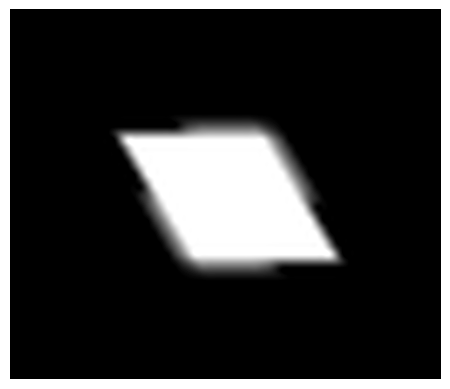

In [23]:
md = mpb.MPBData(rectify=True, periods=1, resolution=64)
eps = ms.get_epsilon()
converted_eps = md.convert(eps)

plt.imshow(converted_eps.T, interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

NameError: name 'tm_freqs' is not defined

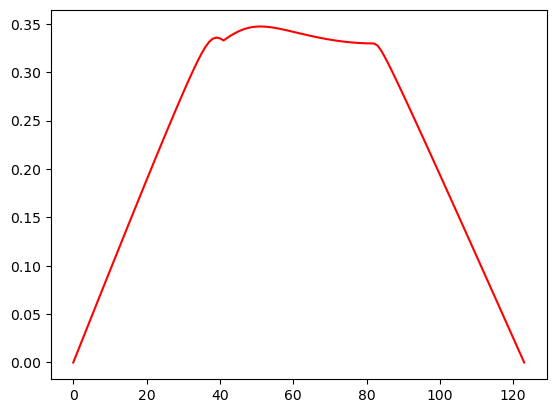

In [13]:
import matplotlib.pyplot as plt
numk,tmp=np.shape(te_freqs)
klist=range(numk)

fig,ax=plt.subplots()
x = range(len(te_freqs))

for l in range(num_bands):
    plt.plot(te_freqs[:,l],'r-')
    plt.plot(tm_freqs[:,l],'b-')
plt.ylim([0,0.4])
plt.ylabel('$\omega a/(2\pi c)$')

# Plot gaps
for gap in te_gaps:
    if gap[0] > 1:
        ax.fill_between(x, gap[1], gap[2], color='red', alpha=0.2)
for gap in tm_gaps:
     if gap[0] > 1:
         ax.fill_between(x, gap[1], gap[2], color='blue', alpha=0.2)
        

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)

[Text(0.0, 0, 'Γ'),
 Text(41.0, 0, 'K'),
 Text(82.0, 0, 'M'),
 Text(123.0, 0, 'Γ')]

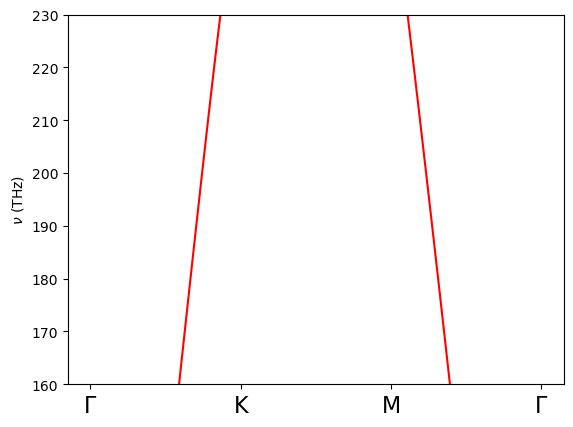

In [117]:
c=3e8
import matplotlib.pyplot as plt
numk,tmp=np.shape(te_freqs)
klist=range(numk)

fig,ax=plt.subplots()
x = range(len(te_freqs))

for l in range(num_bands):
    plt.plot(te_freqs[:,l]/a/1e-9*c/1e12,'r-')
plt.ylim([160,230])
plt.ylabel('$\\nu $ (THz)')
  

points_in_between = (len(te_freqs) - 4) / 3
tick_locs = [i*points_in_between+i for i in range(4)]
tick_labs = ['Γ', 'K', 'M', 'Γ']
ax.set_xticks(tick_locs)
ax.set_xticklabels(tick_labs, size=16)